https://oj.rnd.huawei.com/problems/1247/details

题目描述
在一个直角坐标系上绘制矩形后，如果坐标系上的一个点在某个矩形内部或边上，则说该点被命中一次。

现在绘制N个矩形，请计算最多的命中次数，以及满足该次数的点的数量。

注：只统计坐标值为整数的点。

解答要求
时间限制：2000ms, 内存限制：512MB
输入
首行一个正整数K，代表矩形的数量，取值范围 [1,10000]。
接下来 K 行，每行以 x1 y1 x2 y2 的形式给出一个矩形，其中 (x1, y1) 为左上角的坐标，(x2, y2) 是右下角的坐标。 坐标为整数，取值范围如下：
0 <= x1 < x2 <= 2000
0 <= y2 < y1 <= 2000
注：直角坐标系的原点为(0,0)

输出
两个整数，第一个为最大的命中数，第二个为最大命中次数的坐标点的数量

样例
输入样例 1 复制

4
1 2 2 1
0 3 3 0
4 3 5 2
2 1 4 0
输出样例 1

3 1
提示样例 1
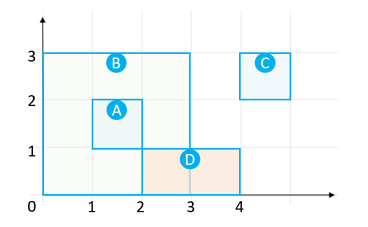

点(1,1)/(1,2)/(2,2)被矩形A和B命中，次数为2。
点(2,0)/(3,0)/(3,1)被矩形B和D命中，次数为2。
点(2,1)被矩形A/B/D命中，次数为3。
因此最大命中数为3，点的数量为1，输出 3 1。


输入样例 2 复制

3
0 3 3 0
2 4 4 2
1 4 2 3
输出样例 2

3 1
提示样例 2
点（2,3）被3个矩形命中，即：最大命中数为3，点的数量为1。



输入样例 3 复制

2
0 3 3 0
2 4 4 2
输出样例 3

2 4
提示样例 3
两个矩形重合在 (2,2) (2,3) (3,2) (3,3)，即这四个点的被命中次数均为2。

In [7]:
"""
Copyright (c) Huawei Technologies Co., Ltd. 2019-2021. All rights reserved.
Description: 上机编程认证
Note: 缺省代码仅供参考，可自行决定使用、修改或删除
"""
from typing import List


class Solution:

    def get_max_covered(self, rectangles: List[List[int]]) -> List[int]:
        # 第一步需要确定我们到底在多大的范围内选取矩阵
        min_x, min_y = 2000, 2000
        max_x, max_y = 0, 0
        for rectangle in rectangles:
            x1, y1, x2, y2 = rectangle
            min_x = min(min_x, x1, x2)
            min_y = min(min_y, y1, y2)
            max_x = max(max_x, x1, x2)
            max_y = max(max_y, y1, y2)
        matrix = [[0] * (max_x - min_x + 2) for _ in range(max_y - min_y + 2)]
        temp = [[0] * (max_x - min_x + 2) for _ in range(max_y - min_y + 2)]
        """
        前缀和是从左下角->右上角求和，题目给出的是 左上角和右下角
        这里需要进行简单的交换来实现
        """
        for rectangle in rectangles:
            x1, y1, x2, y2 = rectangle
            y1, y2 = y2, y1
            x1 -= min_x
            x2 -= min_x
            y1 -= min_y
            y2 -= min_y
            matrix[y1][x1] += 1
            matrix[y1][x2 + 1] -= 1
            matrix[y2 + 1][x1] -= 1
            matrix[y2 + 1][x2 + 1] += 1
        count = 0
        times = 0
        for x in range(1, max_x - min_x + 2):
            for y in range(1, max_y - min_y + 2):
                temp[y][x] = temp[y - 1][x] + temp[y][x - 1] - temp[y - 1][x - 1] + matrix[y - 1][x - 1]
                if temp[y][x] > count:
                    count = temp[y][x]
                    times = 1
                elif temp[y][x] == count:
                    times += 1
        return [count, times]

In [8]:
num = 2
rectangles = [[798, 800, 800, 798],
              [799, 800, 799, 796]]
function = Solution()
results = function.get_max_covered(rectangles)

In [9]:
results

[2, 3]

In [10]:
class Solution:

    def get_max_covered(self, rectangles: List[List[int]]) -> List[int]:
        # 第一步需要确定我们到底在多大的范围内选取矩阵
        matrix = [[0] * 2002 for _ in range(2002)]
        min_x, min_y = 2002, 2002
        max_x, max_y = -1, -1
        count, times = 0, 0
        """
        前缀和是从左下角->右上角求和，题目给出的是 左上角和右下角
        这里需要进行简单的交换来实现
        """
        for rectangle in rectangles:
            x1, y1, x2, y2 = rectangle
            y1, y2 = y2, y1
            min_x = min(min_x, x1, x2)
            min_y = min(min_y, y1, y2)
            max_x = max(max_x, x1, x2)
            max_y = max(max_y, y1, y2)
            matrix[y1][x1] += 1
            matrix[y1][x2 + 1] -= 1
            matrix[y2 + 1][x1] -= 1
            matrix[y2 + 1][x2 + 1] += 1
        temp = [[0] * (max_x - min_x + 2) for _ in range(max_y - min_y + 2)]
        for x in range(1, max_x - min_x + 2):
            for y in range(1, max_y - min_y + 2):
                temp[y][x] = temp[y - 1][x] + temp[y][x - 1] - temp[y - 1][x - 1] + matrix[y + min_y - 1][x + min_x - 1]
                if temp[y][x] > count:
                    count = temp[y][x]
                    times = 1
                elif temp[y][x] == count:
                    times += 1
        return [count, times]

In [11]:
# num = 4
# rectangles = [[1, 2, 2, 1],
# [0, 3, 3, 0],
# [4, 3, 5, 2],
# [2, 1, 4, 0]]
num = 2
rectangles = [[798, 800, 800, 798],
              [799, 800, 799, 796]]
function = Solution()
results = function.get_max_covered(rectangles)

In [12]:
results

[2, 3]